In [2]:
!pip uninstall tensorflow numpy -y

Found existing installation: tensorflow 2.9.1
Uninstalling tensorflow-2.9.1:
  Successfully uninstalled tensorflow-2.9.1
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2


In [3]:
!pip install numpy==1.24 tensorflow==2.10.0

  Using cached numpy-1.24.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached tensorflow-2.10.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (578.1 MB)
  Using cached flatbuffers-24.12.23-py2.py3-none-any.whl (30 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall:

In [10]:
!pip install --upgrade kagglehub

  Using cached kagglehub-0.3.6-py3-none-any.whl (51 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print(f"Dataset downloaded to: {path}")

Dataset downloaded to: /home/jovyan/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


## Importing the tensorflow and the necessary packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

2025-01-09 12:16:55.393381: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-09 12:16:55.538404: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 12:16:55.576302: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 12:16:56.314927: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

### Doing some preprocessing of the images

In [2]:
from tensorflow.keras.preprocessing.image import load_img

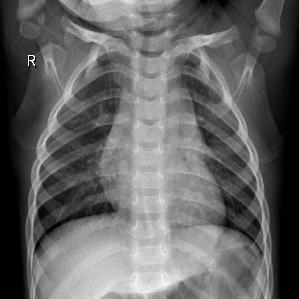

In [8]:
path = '/home/jovyan/examples/examples/tensorflow/chest_xray_pneumonia_dataset/chest_xray/chest_xray/train/NORMAL'
name = 'IM-0117-0001.jpeg'
fullname = f'{path}/{name}'
load_img(fullname, target_size=(299, 299))

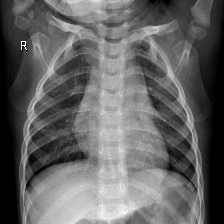

In [9]:
img = load_img(fullname, target_size=(224, 224))
img

In [10]:
x = np.array(img)
x.shape

(224, 224, 3)

In [3]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.applications.densenet import decode_predictions

In [12]:
model = DenseNet121(weights='imagenet', input_shape=(224, 224, 3))

2025-01-08 12:13:33.784246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-08 12:13:33.790013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-08 12:13:33.790226: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-08 12:13:33.790747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [13]:
X = np.array([x])
X.shape

(1, 224, 224, 3)

In [14]:
X = preprocess_input(X)

In [15]:
pred = model.predict(X)

2025-01-08 12:18:07.075424: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2025-01-08 12:18:07.777030: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-01-08 12:18:07.777775: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-01-08 12:18:07.777816: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2025-01-08 12:18:07.778499: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-01-08 12:18:07.778585: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 4s 4s/step


In [16]:
decode_predictions(pred)

[[('n04523525', 'vault', 0.49073303),
  ('n04590129', 'window_shade', 0.07636444),
  ('n01990800', 'isopod', 0.061299726),
  ('n01768244', 'trilobite', 0.039236125),
  ('n03544143', 'hourglass', 0.026743805)]]

## Transfer Learning, Using the DensNet and adding my dense layer

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
  '/home/jovyan/examples/examples/tensorflow/chest_xray_pneumonia_dataset/chest_xray/chest_xray/train',
  target_size=(150, 150),
  batch_size=32,
  class_mode = 'binary'
)

Found 4836 images belonging to 2 classes.


In [19]:
train_ds.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [20]:
X, y = next(train_ds)

In [21]:
y[:5]

array([0., 1., 1., 0., 1.], dtype=float32)

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
  '/home/jovyan/examples/examples/tensorflow/chest_xray_pneumonia_dataset/chest_xray/chest_xray/val',
  target_size=(150, 150),
  batch_size=32,
  class_mode = 'binary',
  shuffle=False
)

Found 396 images belonging to 2 classes.


### Taking the base model which is the DensNet and building on top of it, removing the dense layer by setting the `include_top` to `False`.

In [23]:
base_model = DenseNet121(
  weights='imagenet',
  include_top=False,
  input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(1)(vectors)

model = keras.Model(inputs, outputs)

In [24]:
preds = model.predict(X)

1/1 [==============================] - 3s 3s/step


In [25]:
preds[0]

array([2.2309167], dtype=float32)

In [26]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [27]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
152/152 [==============================] - 72s 438ms/step - loss: 0.1997 - accuracy: 0.9204 - val_loss: 0.3012 - val_accuracy: 0.9015
Epoch 2/10
152/152 [==============================] - 53s 350ms/step - loss: 0.1218 - accuracy: 0.9504 - val_loss: 0.2067 - val_accuracy: 0.9343
Epoch 3/10
152/152 [==============================] - 53s 347ms/step - loss: 0.1005 - accuracy: 0.9605 - val_loss: 0.2184 - val_accuracy: 0.9394
Epoch 4/10
152/152 [==============================] - 53s 349ms/step - loss: 0.0850 - accuracy: 0.9686 - val_loss: 0.1333 - val_accuracy: 0.9520
Epoch 5/10
152/152 [==============================] - 53s 351ms/step - loss: 0.0837 - accuracy: 0.9688 - val_loss: 0.2302 - val_accuracy: 0.9444
Epoch 6/10
152/152 [==============================] - 53s 350ms/step - loss: 0.0896 - accuracy: 0.9675 - val_loss: 0.3424 - val_accuracy: 0.9167
Epoch 7/10
152/152 [==============================] - 53s 346ms/step - loss: 0.0785 - accuracy: 0.9708 - val_loss: 0.4954 - val_ac

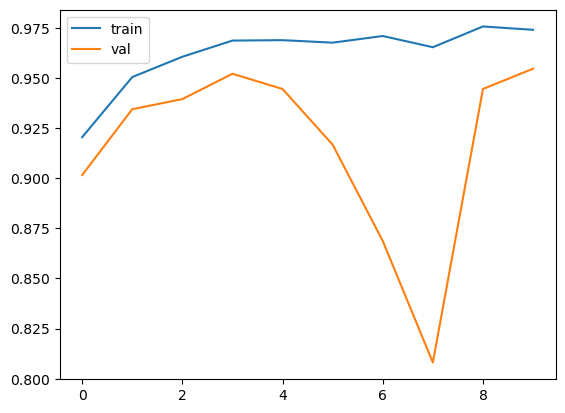

In [28]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

## Adjusting learning rates

In [29]:
def make_model(learning_rate=0.01):
  base_model = DenseNet121(
  weights='imagenet',
  include_top=False,
  input_shape=(150, 150, 3)
)

  base_model.trainable = False

  ########################################

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
  outputs = keras.layers.Dense(1)(vectors)
  model = keras.Model(inputs, outputs)

  ########################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.BinaryCrossentropy(from_logits=True)

  model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
    )

  return model

In [30]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
  print(lr)

  model = make_model(learning_rate=lr)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[lr] =history.history

  print()
  print()

0.0001
Epoch 1/10
152/152 [==============================] - 61s 366ms/step - loss: 0.7893 - accuracy: 0.5362 - val_loss: 0.9067 - val_accuracy: 0.5177
Epoch 2/10
152/152 [==============================] - 53s 349ms/step - loss: 0.4977 - accuracy: 0.7239 - val_loss: 0.6357 - val_accuracy: 0.7020
Epoch 3/10
152/152 [==============================] - 53s 348ms/step - loss: 0.3552 - accuracy: 0.8379 - val_loss: 0.5023 - val_accuracy: 0.7854
Epoch 4/10
152/152 [==============================] - 53s 351ms/step - loss: 0.2839 - accuracy: 0.8854 - val_loss: 0.4236 - val_accuracy: 0.8535
Epoch 5/10
152/152 [==============================] - 55s 359ms/step - loss: 0.2429 - accuracy: 0.9041 - val_loss: 0.3865 - val_accuracy: 0.8662
Epoch 6/10
152/152 [==============================] - 54s 358ms/step - loss: 0.2180 - accuracy: 0.9107 - val_loss: 0.3252 - val_accuracy: 0.8838
Epoch 7/10
152/152 [==============================] - 54s 358ms/step - loss: 0.2005 - accuracy: 0.9210 - val_loss: 0.3310 -

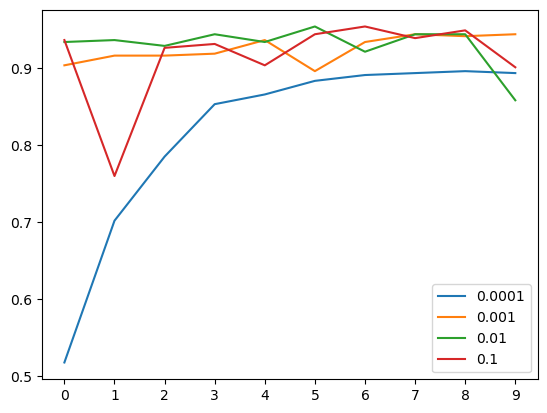

In [31]:
for lr, hist in scores.items():
   plt.plot(hist['val_accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

#### As you can see when i compare the rate = 0.001 and 0.01, always 0.01 is better, only one instance is better the 0.001 and i think it's by chance and it got luck. Which means this model the 0.01 learning rate is better among the other learning rates.The other arguments is when you compare the training and validation between the learning rates, 0.001 and 0.01, the gap is not that much incase of the 0.01 compared to the 0.001, which is why am going the `learning_rate=0.01`

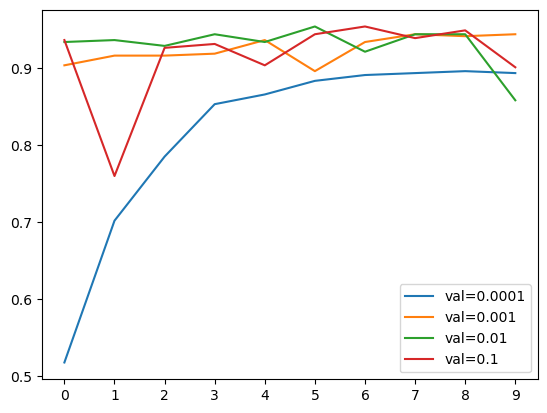

In [32]:
for lr, hist in scores.items():
  #  plt.plot(hist['accuracy'], label=('train=%s' % lr))
   plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [33]:
del scores[0.0001]
del scores[0.1]

## Checkpointing
 - Saving the best model only
 - Training a model with callbacks

In [34]:
model.save_weights('model_v1.weights.h5')

In [35]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'DensNet_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [36]:
learning_rate = 0.01

model = make_model(learning_rate=learning_rate)
history = model.fit(
  train_ds,
  epochs=10,
  validation_data=val_ds,
  callbacks=[checkpoint]
)

Epoch 1/10
152/152 [==============================] - 62s 369ms/step - loss: 0.1963 - accuracy: 0.9212 - val_loss: 0.1669 - val_accuracy: 0.9470
Epoch 2/10
152/152 [==============================] - 53s 347ms/step - loss: 0.1142 - accuracy: 0.9566 - val_loss: 0.1949 - val_accuracy: 0.9419
Epoch 3/10
152/152 [==============================] - 53s 347ms/step - loss: 0.1019 - accuracy: 0.9582 - val_loss: 0.2083 - val_accuracy: 0.9369
Epoch 4/10
152/152 [==============================] - 53s 351ms/step - loss: 0.0778 - accuracy: 0.9696 - val_loss: 0.1707 - val_accuracy: 0.9369
Epoch 5/10
152/152 [==============================] - 53s 350ms/step - loss: 0.0870 - accuracy: 0.9659 - val_loss: 0.4005 - val_accuracy: 0.8990
Epoch 6/10
152/152 [==============================] - 53s 349ms/step - loss: 0.0704 - accuracy: 0.9733 - val_loss: 0.2899 - val_accuracy: 0.9167
Epoch 7/10
152/152 [==============================] - 54s 355ms/step - loss: 0.0710 - accuracy: 0.9719 - val_loss: 0.3300 - val_ac

## Adding more layers
 - Adding one inner dense layer
 - Experimenting with different sizes of inner layer

In [37]:
def make_model(learning_rate=0.01, size_inner=100):
  base_model = DenseNet121(
  weights='imagenet',
  include_top=False,
  input_shape=(150, 150, 3)
)

  base_model.trainable = False

  ########################################

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
    
  inner =  keras.layers.Dense(size_inner, activation='relu')(vectors)
    
  outputs = keras.layers.Dense(1)(inner)

  model = keras.Model(inputs, outputs)

  ########################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.BinaryCrossentropy(from_logits=True)

  model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
    )

  return model

In [38]:
learning_rate = 0.01

scores = {}

for size in [10, 100, 1000]:
  print(size)

  model = make_model(learning_rate=learning_rate, size_inner=size)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[size] =history.history

  print()
  print()

10
Epoch 1/10
152/152 [==============================] - 61s 364ms/step - loss: 0.3190 - accuracy: 0.9059 - val_loss: 0.3600 - val_accuracy: 0.9141
Epoch 2/10
152/152 [==============================] - 53s 349ms/step - loss: 0.1564 - accuracy: 0.9545 - val_loss: 0.2765 - val_accuracy: 0.9268
Epoch 3/10
152/152 [==============================] - 53s 349ms/step - loss: 0.1286 - accuracy: 0.9549 - val_loss: 0.1889 - val_accuracy: 0.9419
Epoch 4/10
152/152 [==============================] - 53s 348ms/step - loss: 0.0937 - accuracy: 0.9702 - val_loss: 0.1840 - val_accuracy: 0.9444
Epoch 5/10
152/152 [==============================] - 53s 349ms/step - loss: 0.0914 - accuracy: 0.9665 - val_loss: 0.2972 - val_accuracy: 0.9192
Epoch 6/10
152/152 [==============================] - 53s 349ms/step - loss: 0.0848 - accuracy: 0.9704 - val_loss: 0.1698 - val_accuracy: 0.9545
Epoch 7/10
152/152 [==============================] - 53s 346ms/step - loss: 0.0747 - accuracy: 0.9739 - val_loss: 0.1693 - val

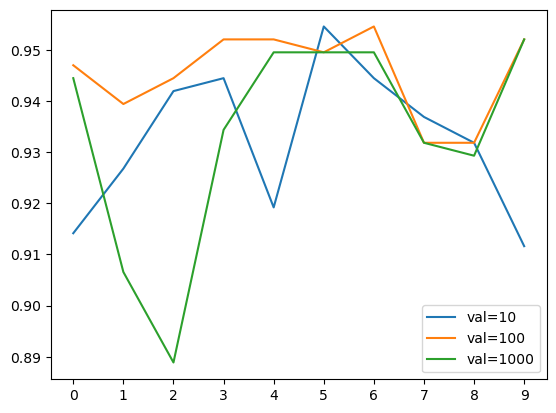

In [40]:
for size, hist in scores.items():
  #  plt.plot(hist['accuracy'], label=('train=%s' % lr))
   plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

### Here, am going with the `size = 100` interms of adding inner layers

## Regularization and dropout
 - I regularized by freezing part of the network
 - I added dropout to my model
 - I experimented with different values

In [41]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.2):
  base_model = DenseNet121(
  weights='imagenet',
  include_top=False,
  input_shape=(150, 150, 3)
)

  base_model.trainable = False

  ########################################

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
    
  inner =  keras.layers.Dense(size_inner, activation='relu')(vectors)
  drop = keras.layers.Dropout(droprate)(inner)
    
  outputs = keras.layers.Dense(1)(drop)

  model = keras.Model(inputs, outputs)

  ########################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.BinaryCrossentropy(from_logits=True)

  model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
    )

  return model

In [42]:
learning_rate = 0.01
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
  print(droprate)

  model = make_model(
      learning_rate=learning_rate, 
      size_inner=size,
      droprate=droprate
  )
  history = model.fit(train_ds, epochs=15, validation_data=val_ds)
  scores[droprate] = history.history

  print()
  print()

0.0
Epoch 1/15
152/152 [==============================] - 62s 366ms/step - loss: 0.8046 - accuracy: 0.8892 - val_loss: 0.2974 - val_accuracy: 0.8990
Epoch 2/15
152/152 [==============================] - 53s 351ms/step - loss: 0.1131 - accuracy: 0.9562 - val_loss: 0.2640 - val_accuracy: 0.9192
Epoch 3/15
152/152 [==============================] - 53s 348ms/step - loss: 0.0979 - accuracy: 0.9624 - val_loss: 0.1933 - val_accuracy: 0.9394
Epoch 4/15
152/152 [==============================] - 53s 348ms/step - loss: 0.1020 - accuracy: 0.9603 - val_loss: 0.1699 - val_accuracy: 0.9444
Epoch 5/15
152/152 [==============================] - 53s 347ms/step - loss: 0.0708 - accuracy: 0.9715 - val_loss: 0.1514 - val_accuracy: 0.9470
Epoch 6/15
152/152 [==============================] - 53s 348ms/step - loss: 0.0730 - accuracy: 0.9719 - val_loss: 0.1701 - val_accuracy: 0.9495
Epoch 7/15
152/152 [==============================] - 53s 349ms/step - loss: 0.0626 - accuracy: 0.9762 - val_loss: 0.1879 - va

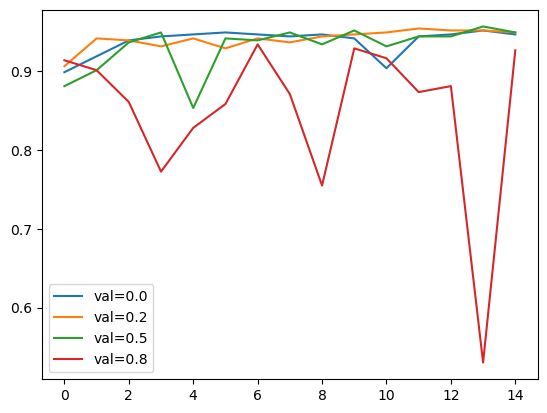

In [43]:
for droprate, hist in scores.items():
  #  plt.plot(hist['accuracy'], label=('train=%s' % lr))
   plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

# plt.ylim(0.90, 0.96)
plt.legend()

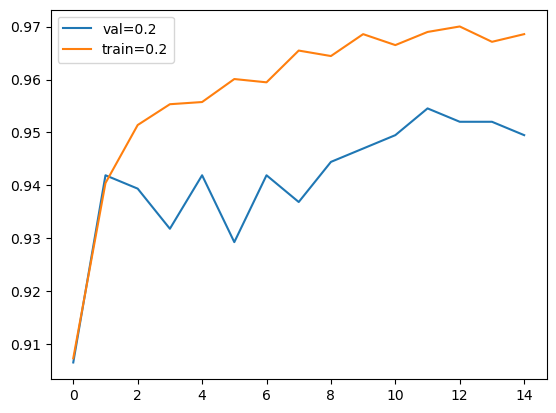

In [44]:
hist = scores[0.2]  # Assuming this stores the history for droprate=0.2

plt.plot(hist['val_accuracy'], label=('val=%s' % str(0.2)))  # Convert droprate to string
plt.plot(hist['accuracy'], label=('train=%s' % str(0.2)))  # Convert droprate to string

plt.legend()

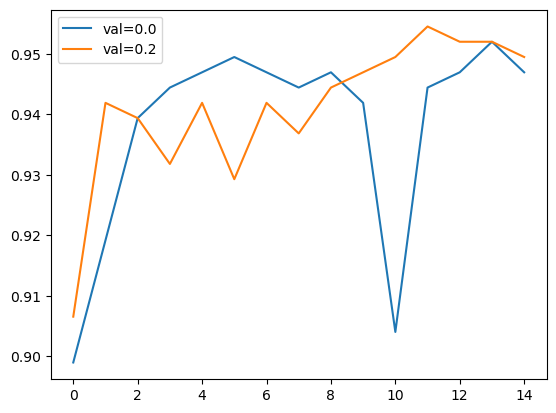

In [47]:
hist = scores[0.0]  # Assuming this stores the history for droprate=0.2
plt.plot(hist['val_accuracy'], label=('val=%s' % str(0.0)))  # Convert droprate to string

hist = scores[0.2]  # Assuming this stores the history for droprate=0.2
plt.plot(hist['val_accuracy'], label=('val=%s' % str(0.2)))  # Convert droprate to string

plt.legend()

### Here, regularization am going with the `droprate = 0.2` after i visualized the history

## Data augmentation
  - Training a model with different augmentations

In [53]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,    
    zoom_range = 0.1,
    vertical_flip = True,
    shear_range = 10.0,
)

train_ds = train_gen.flow_from_directory(
  '/home/jovyan/examples/examples/tensorflow/chest_xray_pneumonia_dataset/chest_xray/chest_xray/train',
  target_size=(150, 150),
  batch_size=32,
  class_mode = 'binary'
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
  '/home/jovyan/examples/examples/tensorflow/chest_xray_pneumonia_dataset/chest_xray/chest_xray/val',
  target_size=(150, 150),
  batch_size=32,
  class_mode = 'binary',
  shuffle=False
)

Found 4836 images belonging to 2 classes.
Found 396 images belonging to 2 classes.


In [54]:
learning_rate = 0.01
size = 100
droprate = 0.2

model = make_model(
      learning_rate=learning_rate, 
      size_inner=size,
      droprate=droprate
)

history = model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
152/152 [==============================] - 80s 489ms/step - loss: 0.4857 - accuracy: 0.8840 - val_loss: 0.3151 - val_accuracy: 0.8914
Epoch 2/30
152/152 [==============================] - 73s 480ms/step - loss: 0.1728 - accuracy: 0.9322 - val_loss: 0.2205 - val_accuracy: 0.9343
Epoch 3/30
152/152 [==============================] - 72s 472ms/step - loss: 0.1634 - accuracy: 0.9303 - val_loss: 0.1759 - val_accuracy: 0.9293
Epoch 4/30
152/152 [==============================] - 73s 482ms/step - loss: 0.1429 - accuracy: 0.9479 - val_loss: 0.1812 - val_accuracy: 0.9419
Epoch 5/30
152/152 [==============================] - 73s 481ms/step - loss: 0.1508 - accuracy: 0.9384 - val_loss: 0.2062 - val_accuracy: 0.9318
Epoch 6/30
152/152 [==============================] - 73s 483ms/step - loss: 0.1464 - accuracy: 0.9394 - val_loss: 0.1678 - val_accuracy: 0.9293
Epoch 7/30
152/152 [==============================] - 73s 478ms/step - loss: 0.1511 - accuracy: 0.9411 - val_loss: 0.1657 - val_ac

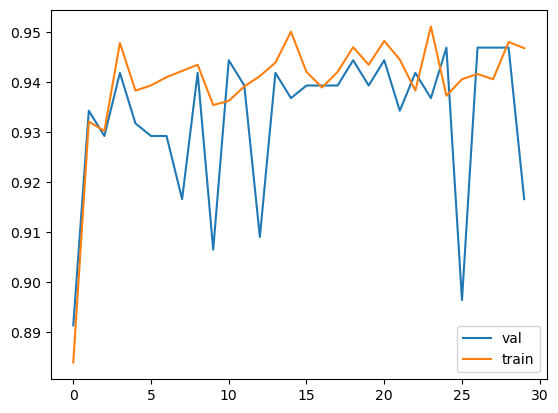

In [57]:
hist = history.history  
plt.plot(hist['val_accuracy'], label='val')  
plt.plot(hist['accuracy'], label='train')  

plt.legend()

## Training the larger model

In [5]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.2):
  base_model = DenseNet121(
  weights='imagenet',
  include_top=False,
  input_shape=(input_size, input_size, 3)
)

  base_model.trainable = False

  ########################################

  inputs = keras.Input(shape=(input_size, input_size, 3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
    
  inner =  keras.layers.Dense(size_inner, activation='relu')(vectors)
  drop = keras.layers.Dropout(droprate)(inner)
    
  outputs = keras.layers.Dense(1, activation='sigmoid')(drop)

  model = keras.Model(inputs, outputs)

  ########################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.BinaryCrossentropy(from_logits=False)

  model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
    )

  return model

In [9]:
input_size = 224

In [10]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,    
    zoom_range = 0.1,
    vertical_flip = True,
    horizontal_flip=True,
    shear_range = 10.0,
)

train_ds = train_gen.flow_from_directory(
  '/home/jovyan/examples/examples/tensorflow/chest_xray_pneumonia_dataset/chest_xray/chest_xray/train',
  target_size=(input_size, input_size),
  batch_size=32,
  class_mode = 'binary'
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
  '/home/jovyan/examples/examples/tensorflow/chest_xray_pneumonia_dataset/chest_xray/chest_xray/val',
  target_size=(input_size, input_size),
  batch_size=32,
  class_mode = 'binary',
  shuffle=False
)

Found 4836 images belonging to 2 classes.
Found 396 images belonging to 2 classes.


In [12]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'DensNet_v5_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [14]:
learning_rate = 0.01
size = 100
droprate = 0.2

model = make_model(
      input_size = 224,
      learning_rate=learning_rate, 
      size_inner=size,
      droprate=droprate
)

history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/30
152/152 [==============================] - 94s 588ms/step - loss: 0.3722 - accuracy: 0.9067 - val_loss: 0.1787 - val_accuracy: 0.9242
Epoch 2/30
152/152 [==============================] - 87s 573ms/step - loss: 0.1488 - accuracy: 0.9425 - val_loss: 0.1759 - val_accuracy: 0.9293
Epoch 3/30
152/152 [==============================] - 87s 572ms/step - loss: 0.1176 - accuracy: 0.9570 - val_loss: 0.1388 - val_accuracy: 0.9394
Epoch 4/30
152/152 [==============================] - 87s 574ms/step - loss: 0.1172 - accuracy: 0.9551 - val_loss: 0.1313 - val_accuracy: 0.9520
Epoch 5/30
152/152 [==============================] - 87s 573ms/step - loss: 0.1284 - accuracy: 0.9500 - val_loss: 0.1235 - val_accuracy: 0.9470
Epoch 6/30
152/152 [==============================] - 88s 578ms/step - loss: 0.1213 - accuracy: 0.9522 - val_loss: 0.1275 - val_accuracy: 0.9596
Epoch 7/30
152/152 [==============================] - 87s 570ms/step - loss: 0.1154 - accuracy: 0.9547 - val_loss: 0.1907 - val_ac

## Using the model
 - Loading the model, Evaluating the model, and i'll get the predictions

In [5]:
import tensorflow as tf
from tensorflow import keras

In [7]:
model = keras.models.load_model('DensNet_v5_06_0.960.keras')

2025-01-09 12:17:38.476960: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-09 12:17:38.483703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-09 12:17:38.483942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-09 12:17:38.484452: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.densenet import preprocess_input

In [9]:
test_gen= ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
  '/home/jovyan/examples/examples/tensorflow/chest_xray_pneumonia_dataset/chest_xray/chest_xray/test',
  target_size=(224, 224),
  batch_size=32,
  class_mode = 'binary',
  shuffle=False
)

Found 624 images belonging to 2 classes.


In [10]:
model.evaluate(test_ds)

2025-01-09 12:17:57.672557: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2025-01-09 12:17:58.346615: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-01-09 12:17:58.347347: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-01-09 12:17:58.347389: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2025-01-09 12:17:58.348055: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-01-09 12:17:58.348138: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


20/20 [==============================] - 12s 338ms/step - loss: 0.3616 - accuracy: 0.8590


[0.36163827776908875, 0.8589743375778198]

In [24]:
path =  '/home/jovyan/examples/examples/tensorflow/chest_xray_pneumonia_dataset/chest_xray/chest_xray/test/NORMAL/IM-0065-0001.jpeg'

In [25]:
img = load_img(path, target_size=(224, 224))

In [26]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 224, 224, 3)

In [27]:
X = preprocess_input(X)

In [28]:
pred = model.predict(X)

1/1 [==============================] - 0s 35ms/step


In [29]:
pred[0]

array([0.13554092], dtype=float32)

In [30]:
probability = pred[0][0]  # Extract the probability value

# Decode the probability to a binary label
binary_label = int(probability > 0.5)

# Map binary labels to class names
class_labels = {0: 'NORMAL', 1: 'PNEUMONIA'}
predicted_class = class_labels[binary_label]

# Print the result
print(f"Predicted class: {predicted_class}, Probability: {probability}")


Predicted class: NORMAL, Probability: 0.1355409175157547
